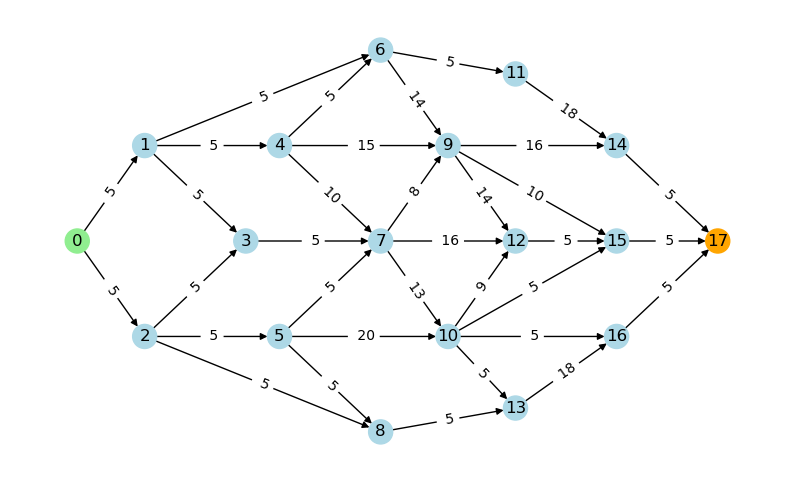

Which nodes the water reaches from 0, when it rises to a given height 
The numbers on the arrows are the "terrain" heights.
Enter the water height: 10


In [5]:
# BFS_1.  WHERE UNTIL WILL THE WATER RISE
# We give the water a height and see which nodes the water reaches and
# along which routes.

# INIT
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd

%matplotlib inline   
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

# CREATE GRAPH
# Nodes:
G = nx.DiGraph()
G.add_nodes_from([
     (0, {"color": "lightgreen",}),
     (1, {"color": "lightblue",}),
     (2, {"color": "lightblue",}),
     (3, {"color": "lightblue",}),
     (4, {"color": "lightblue",}), 
     (5, {"color": "lightblue",}), 
     (6, {"color": "lightblue",}),
     (7, {"color": "lightblue",}),
     (8, {"color": "lightblue",}),
     (9, {"color": "lightblue",}),
     (10,{"color": "lightblue",}),
     (11,{"color": "lightblue",}),
     (12,{"color": "lightblue",}),
     (13,{"color": "lightblue",}),
     (14,{"color": "lightblue",}),
     (15,{"color": "lightblue",}),
     (16,{"color": "lightblue",}),
     (17,{"color": "orange"   ,}),
     ])
# Node positions
ps = {0:(0, 0),   1:(2, 0.4),   2:(2,-0.4),  3:(5, 0),  4:(6, 0.4), 
      5:(6,-0.4,),  6:(9, 0.8),  7:(9, 0),  8:(9,-0.8), 9:(11,0.4 ),
     10:(11,-0.4 ), 11:(13, 0.7), 12:(13,0 ), 13:(13,-0.7 ),
     14:(16,0.4 ), 15:(16,0 ),  16:(16,-0.4 ), 17:(19,0 )}
# Node colors are collected into a list of dictionary values:
ncols = nx.get_node_attributes(G, 'color').values()  

# Edges:
G.add_edges_from([
        (0, 1, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (0, 2, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (1, 3, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (1, 4, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (1, 6, {"height": 5, "weight": 7, "color":'k', "width": 1}),
        (2, 3, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (2, 5, {"height": 5, "weight": 3, "color":'k', "width": 1}),
        (2, 8, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (3, 7, {"height": 5, "weight": 3, "color":'k', "width": 1}),
        (4, 6, {"height": 5, "weight": 6, "color":'k', "width": 1}),
        (4, 7, {"height": 10, "weight": 4, "color":'k', "width": 1}),
        (4, 9, {"height": 15, "weight": 2, "color":'k', "width": 1}),
        (5, 7, {"height": 5, "weight":16, "color":'k', "width": 1}),
        (5, 8, {"height": 5, "weight": 2, "color":'k', "width": 1}),
        (5,10, {"height": 20, "weight":17, "color":'k', "width": 1}),
        (6, 9, {"height": 14, "weight":18, "color":'k', "width": 1}),
        (6,11, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (7, 9, {"height": 8, "weight": 1, "color":'k', "width": 1}),
        (7,10, {"height": 13, "weight": 3, "color":'k', "width": 1}),
        (7,12, {"height": 16, "weight": 5, "color":'k', "width": 1}),
        (8,13, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (9,12, {"height": 14, "weight":30, "color":'k', "width": 1}),
        (9,14, {"height": 16, "weight": 3, "color":'k', "width": 1}),
        (9,15, {"height": 10, "weight":18, "color":'k', "width": 1}),
        (10,12,{"height": 9, "weight": 4, "color":'k', "width": 1}),
        (10,13,{"height": 5, "weight": 2, "color":'k', "width": 1}),
        (10,15,{"height": 5, "weight":17, "color":'k', "width": 1 }),
        (10,16,{"height": 5, "weight":16, "color":'k', "width": 1 }),
        (11,14,{"height": 18, "weight": 3, "color":'k', "width": 1 }),
        (12,15,{"height": 5, "weight": 6, "color":'k', "width": 1 }),
        (13,16,{"height": 18, "weight": 4, "color":'k', "width": 1 }),
        (14,17,{"height": 5, "weight": 3, "color":'k', "width": 1 }),
        (15,17,{"height": 5, "weight": 6, "color":'k', "width": 1 }),
        (16,17,{"height": 5, "weight": 4, "color":'k', "width": 1 }),
    ])
# Here "height" indicates the height of the bottom from some selected base level.
# Edge "weight" value has no use in this application.

# Collect edge atributes into dictionaries:
edge_height = nx.get_edge_attributes(G,'height')
ecols = nx.get_edge_attributes(G, 'color').values()
widths = nx.get_edge_attributes(G, 'width').values()

# DRAW the graph
plt.rcParams["figure.figsize"] = [10, 6]    
nx.draw_networkx(G,
        pos=ps,                                 # Node positions
        node_color=ncols,   
        font_color= 'k',                        # Node fonts
        edge_color=ecols,
        with_labels=True,)

# Create edgelabels as a dictionary 'elabs', where the key is an edge and..
# the value is 'edge_height':
elabs = dict([((u,v), f' {edge_height[u,v]}')   for u,v in G.edges])  
# Draw the edge labels separately: 
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs) 
plt.axis("off")                                 # No frames around the picture                   
plt.show()
print('Which nodes the water reaches from 0, when it rises to a given height ')
print('The numbers on the arrows are the "terrain" heights.')
limit = int(input('Enter the water height: '))
# 'limit' is the limit height above which 'water' does not rise.  


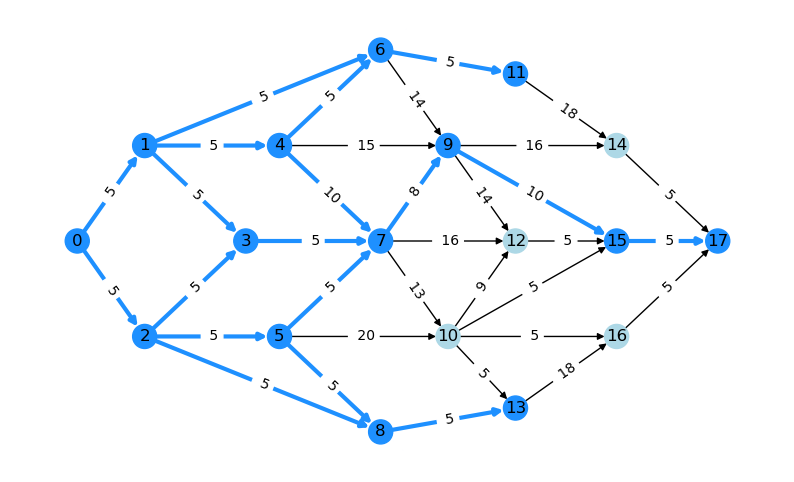

 This is how far the water rises from 0 if its height is 10 m


In [6]:
# RESIDUAL GRAPH
# The edges exceeding the limit height will be removed.

RG = G.copy()               # Residual Graph, from which those edges that exceed the limit height. 
                            # will be removed before  BFS run. 
too_high = []
for u,v in RG.edges:
    if RG.edges[(u,v)]['height']> limit:
        #print(u, v)
        too_high.append((u,v))
for u,v in too_high:     
    RG.remove_edge(u,v)
#print(RG.edges)            #The high edges are removed from RG:stä
   

# BFS 
bfs_eds = list(nx.bfs_edges(RG, 0))
#print(bfs_eds)
bfs_nods = [0] + [v for u, v in bfs_eds]  # The nodes from the edge list. 
#print(bfs_nods)

# HIGHLIGHTING THE SOLUTION: color, line thickness.
# Blue color for solution path nodes:
for n in G.nodes:
    if n in bfs_nods:
        G.nodes[n]['color']= 'dodgerblue'

# Blue color for solution path edges and make them thicker:
for u, v in G.edges:
    if (u, v) in bfs_eds:
        G.edges[(u,v)]['color']= 'dodgerblue'
        G.edges[(u,v)]['width']= 3

# BFS does not print all valid edges for a given node.
# These are the ones with both ends already colored,
# but edge has remained black 'k'. Let's highlight these edges too:
for u,v in G.edges:
    if G.edges[(u,v)]['height']<= limit and G.nodes[u]['color']== 'dodgerblue'\
         and G.edges[(u,v)]['color']== 'k' and G.nodes[v]['color']== 'dodgerblue':
        G.edges[(u,v)]['color']= 'dodgerblue'
        G.edges[(u,v)]['width']= 3

# PRINT 
# Edge atributes into dictionaries:
edge_height = nx.get_edge_attributes(G,'height')
ecols = nx.get_edge_attributes(G, 'color').values()
widths = list(nx.get_edge_attributes(G, 'width').values()) # Tarvit. list()

# Node atributes into dictionaries:
ncols = nx.get_node_attributes(G, 'color').values()

# DRAW
plt.rcParams["figure.figsize"] = [10, 6]    # Kuva-alueen koko
nx.draw_networkx(G,
        pos=ps,                             # Node positions
        node_color=ncols,     
        font_color= 'k',                    # For node labels
        edge_color=ecols,     
        width= widths,                      # Edge widths
        with_labels=True,)

# Create edgelabels dictionary 'elabs', where the key is a edge and..
# the value is 'edge_height':
elabs = dict([((u,v), f' {edge_height[u,v]}')  for u,v in G.edges])
  
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs) 
plt.axis("off")                             # No frames around the picture                 
plt.show()
print(' This is how far the water rises from 0 if its height is', limit, 'm')